In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from itertools import cycle

In [74]:
coin_name = "BTC"

In [75]:
def remove(x):
    """
    This function will strip the data column of the dataframe.
    """
    x = str(x)
    res = x.split(" ")[0]
    return res

In [76]:
data = yf.download(coin_name+"-USD",period="max")

[*********************100%%**********************]  1 of 1 completed


In [77]:
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data.index = data.index.to_series().apply(lambda x:remove(x))  # applying preprocessing function

In [78]:
data.shape

(3567, 6)

In [79]:
print('Total number of days present in the dataset: ',data.shape[0])
print('Total number of fields present in the dataset: ',data.shape[1])

Total number of days present in the dataset:  3567
Total number of fields present in the dataset:  6


In [80]:
data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100

In [81]:
data.tail()

Open          High           Low         Close  \
Date                                                                 
2024-06-18  66490.976562  66556.703125  64066.957031  65140.746094   
2024-06-19  65146.660156  65695.351562  64693.300781  64960.296875   
2024-06-20  64960.296875  66438.960938  64547.847656  64828.656250   
2024-06-21  64837.988281  65007.546875  63378.894531  64096.199219   
2024-06-23  64248.964844  64487.167969  64248.667969  64487.167969   

               Adj Close       Volume  
Date                                   
2024-06-18  65140.746094  39481285950  
2024-06-19  64960.296875  21103423504  
2024-06-20  64828.656250  25641109124  
2024-06-21  64096.199219  26188171739  
2024-06-23  64487.167969   9784448000

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3567 entries, 2014-09-17 to 2024-06-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3567 non-null   float64
 1   High       3567 non-null   float64
 2   Low        3567 non-null   float64
 3   Close      3567 non-null   float64
 4   Adj Close  3567 non-null   float64
 5   Volume     3567 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 195.1+ KB


In [83]:
data.describe()

Open          High           Low         Close     Adj Close  \
count   3567.000000   3567.000000   3567.000000   3567.000000   3567.000000   
mean   16759.708680  17144.065281  16349.664016  16776.400229  16776.400229   
std    18653.183237  19078.985554  18186.120097  18666.002290  18666.002290   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%     1047.384949   1067.280029   1027.945007   1047.510010   1047.510010   
50%     8825.093750   9012.198242   8652.150391   8827.764648   8827.764648   
75%    27590.465820  28097.015625  27150.021484  27606.570312  27606.570312   
max    73079.375000  73750.070312  71334.093750  73083.500000  73083.500000   

             Volume  
count  3.567000e+03  
mean   1.729426e+10  
std    1.919620e+10  
min    5.914570e+06  
25%    2.443005e+08  
50%    1.324991e+10  
75%    2.788558e+10  
max    3.509679e+11

In [84]:
data.index

Index(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
       '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
       ...
       '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16', '2024-06-17',
       '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21', '2024-06-23'],
      dtype='object', name='Date', length=3567)

In [85]:
print('Null Values:',data.isnull().values.sum())

Null Values: 0


In [86]:
print('NA values:',data.isnull().values.any())

NA values: False


In [87]:
# Printing the start date and End date of the dataset

sd=data.index[0]
ed=data.index[-1]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2014-09-17
Ending Date 2024-06-23


In [88]:
def yearly_analysis(start_date,end_date):
    year = data.loc[start_date:end_date]
    year.index = pd.to_datetime(year.index, format='%Y-%m-%d')
    return year

def yearly_chart(yearlyDataset):
    names = cycle([coin_name + ' Open Price',coin_name + ' Close Price',coin_name + ' High Price',coin_name + ' Low Price'])

    fig = px.line(yearlyDataset, x=yearlyDataset.index, y=[yearlyDataset['Open'], yearlyDataset['Close'], 
                                              yearlyDataset['High'], yearlyDataset['Low']],
                 labels={'Date': 'Date','value':coin_name + ' value'})
    fig.update_layout(title_text=coin_name + ' analysis chart', font_size=15, font_color='black',legend_title_text=coin_name + ' Parameters')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    
    fig.show()

def every_year_monthwise_analysis(yearlyDataset):
    monthwise = yearlyDataset.groupby(yearlyDataset.index.strftime('%B'))[['Open','Close']].mean()
    new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
    monthwise = monthwise.reindex(new_order, axis=0)
    return monthwise

def monthly_open_close_chart(monthlyDataset):
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=monthlyDataset.index,
        y=monthlyDataset['Open'],
        name= coin_name + ' Open Price',
        marker_color='crimson'
    ))
    fig.add_trace(go.Bar(
        x=monthlyDataset.index,
        y=monthlyDataset['Close'],
        name= coin_name + ' Close Price',
        marker_color='lightsalmon'
    ))
    
    fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                      title='Monthwise comparision between ' + coin_name + ' open and close price')
    fig.show()

def monthly_high_low_chart(yearlyDataset):
    yearlyDataset.groupby(yearlyDataset.index.strftime('%B'))['Low'].min()
    monthwise_high = yearlyDataset.groupby(yearlyDataset.index.strftime('%B'))['High'].max()
    monthwise_high = monthwise_high.reindex(new_order, axis=0)
    
    monthwise_low = yearlyDataset.groupby(yearlyDataset.index.strftime('%B'))['Low'].min()
    monthwise_low = monthwise_low.reindex(new_order, axis=0)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=monthwise_high.index,
        y=monthwise_high,
        name=coin_name + ' high Price',
        marker_color='rgb(0, 153, 204)'
    ))
    fig.add_trace(go.Bar(
        x=monthwise_low.index,
        y=monthwise_low,
        name=coin_name + ' low Price',
        marker_color='rgb(255, 128, 0)'
    ))
    
    fig.update_layout(barmode='group', 
                      title=' Monthwise High and Low ' + coin_name + ' price')
    fig.show()

In [101]:
year_2014 = yearly_analysis(sd,'2014-12-31')

In [102]:
monthly_2014 = every_year_monthwise_analysis(year_2014)

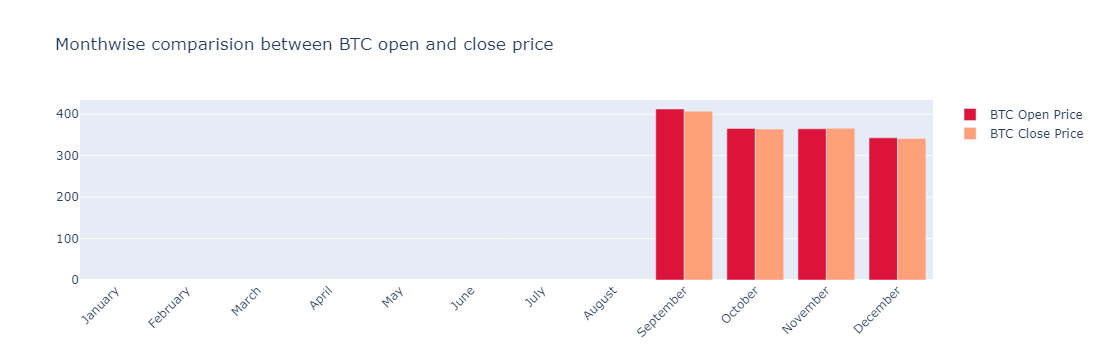

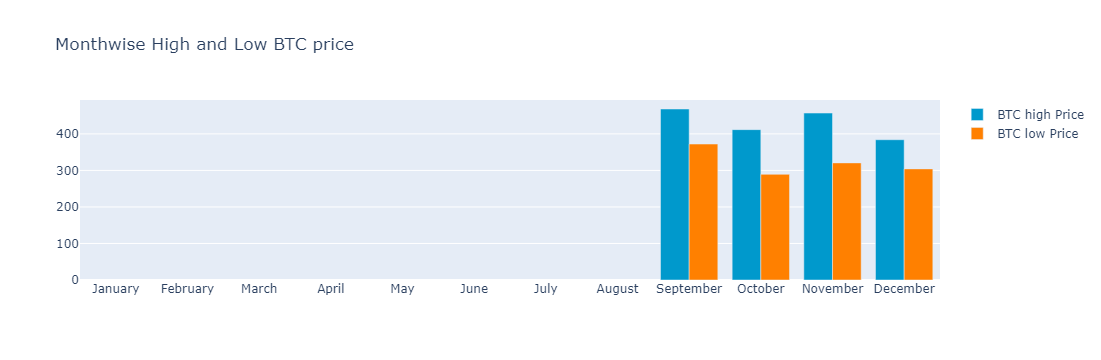

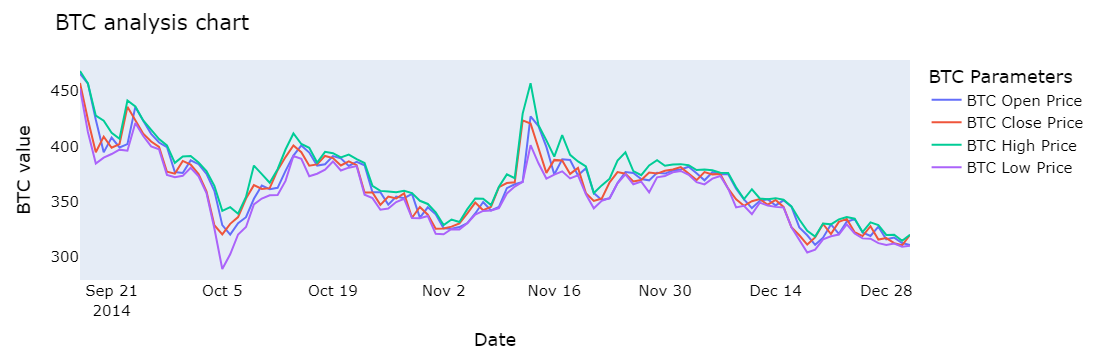

In [103]:
monthly_open_close_chart(monthly_2014)
monthly_high_low_chart(year_2014)
yearly_chart(year_2014)

In [104]:
year_2015 = yearly_analysis('2015-01-01','2015-12-31')

In [105]:
monthly_2015 = every_year_monthwise_analysis(year_2015)

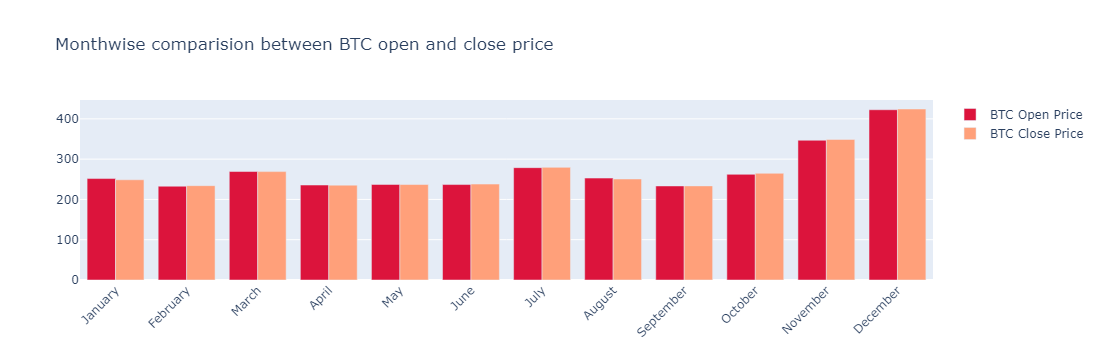

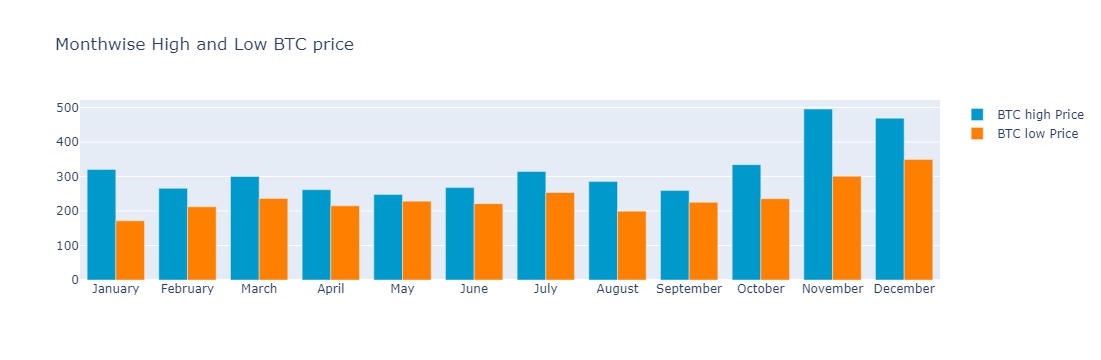

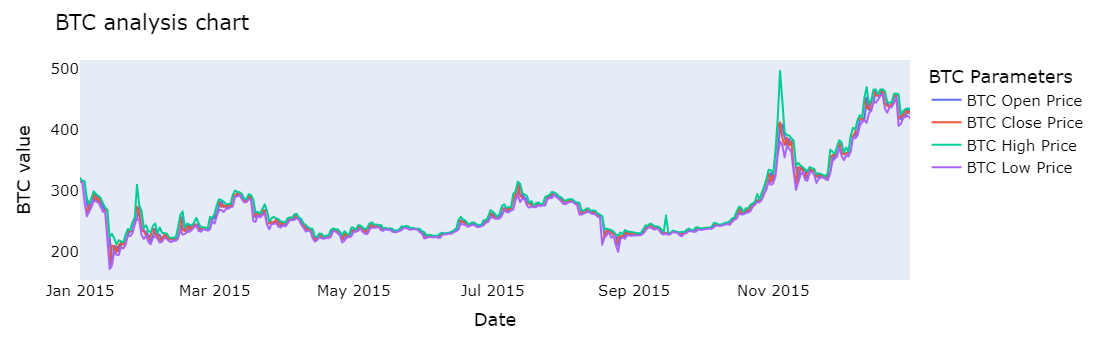

In [106]:
monthly_open_close_chart(monthly_2015)
monthly_high_low_chart(year_2015)
yearly_chart(year_2015)

In [107]:
year_2016 = yearly_analysis('2016-01-01','2016-12-31')

In [108]:
monthly_2016 = every_year_monthwise_analysis(year_2016)

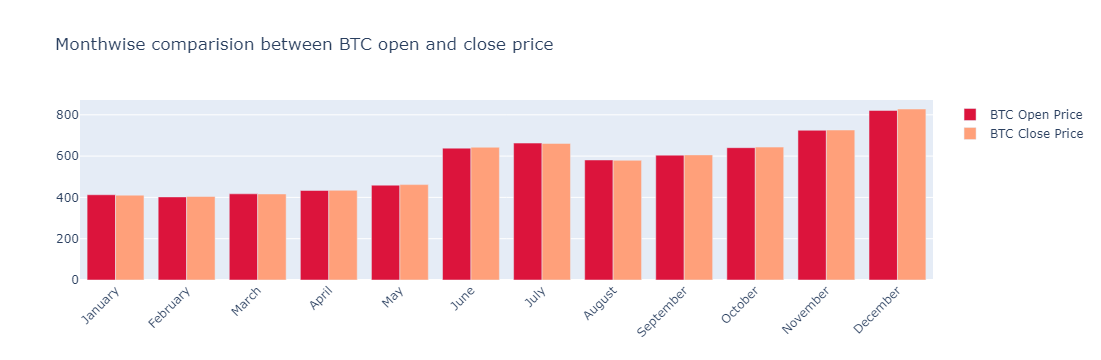

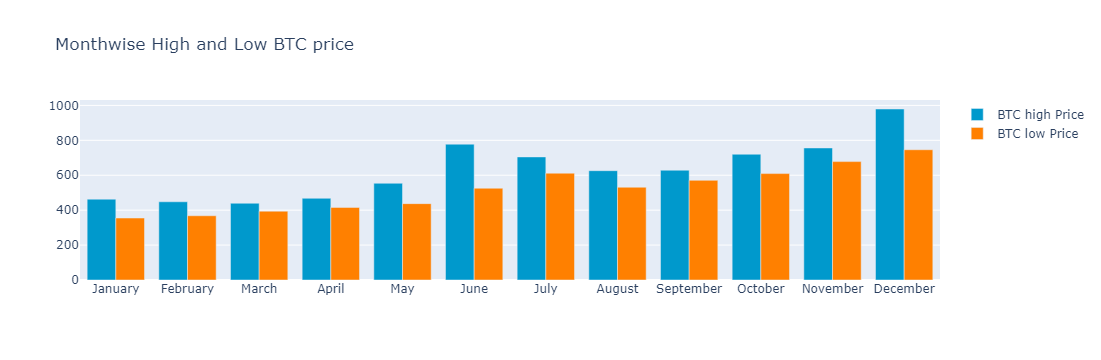

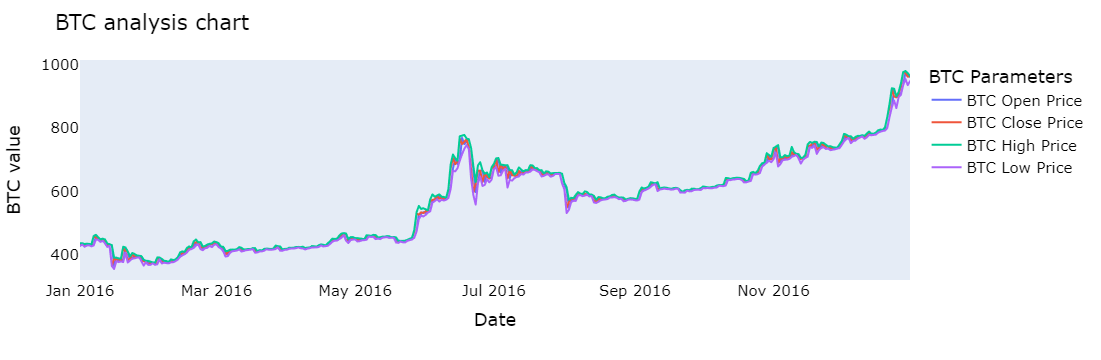

In [109]:
monthly_open_close_chart(monthly_2016)
monthly_high_low_chart(year_2016)
yearly_chart(year_2016)

In [132]:
year_2017 = yearly_analysis('2017-01-01','2017-12-31')
year_2017

Open          High           Low         Close  \
Date                                                                 
2017-01-01    963.658020   1003.080017    958.698975    998.325012   
2017-01-02    998.617004   1031.390015    996.702026   1021.750000   
2017-01-03   1021.599976   1044.079956   1021.599976   1043.839966   
2017-01-04   1044.400024   1159.420044   1044.400024   1154.729980   
2017-01-05   1156.729980   1191.099976    910.416992   1013.380005   
...                  ...           ...           ...           ...   
2017-12-27  16163.500000  16930.900391  15114.299805  15838.500000   
2017-12-28  15864.099609  15888.400391  13937.299805  14606.500000   
2017-12-29  14695.799805  15279.000000  14307.000000  14656.200195   
2017-12-30  14681.900391  14681.900391  12350.099609  12952.200195   
2017-12-31  12897.700195  14377.400391  12755.599609  14156.400391   

               Adj Close       Volume  
Date                                   
2017-01-01    998.325012    147775008  
2017-01-02   1021.750000    222184992  
2017-01-03   1043.839966    185168000  
2017-01-04   1154.729980    344945984  
2017-01-05   1013.380005    510199008  
...                  ...          ...  
2017-12-27  15838.500000  12487600128  
2017-12-28  14606.500000  12336499712  
2017-12-29  14656.200195  13025500160  
2017-12-30  12952.200195  14452599808  
2017-12-31  14156.400391  12136299520  

[365 rows x 6 columns]

In [111]:
monthly_2017 = every_year_monthwise_analysis(year_2017)

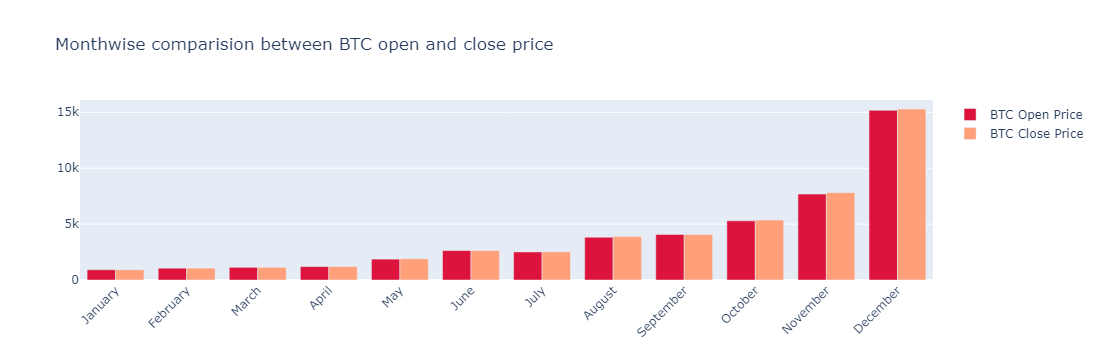

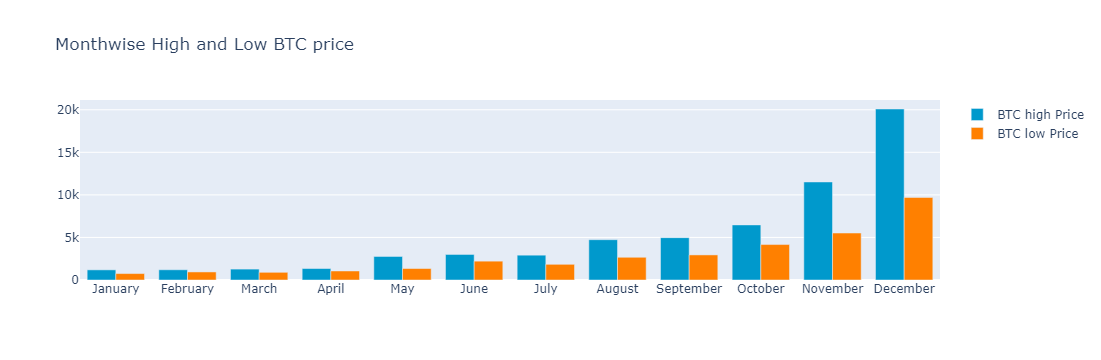

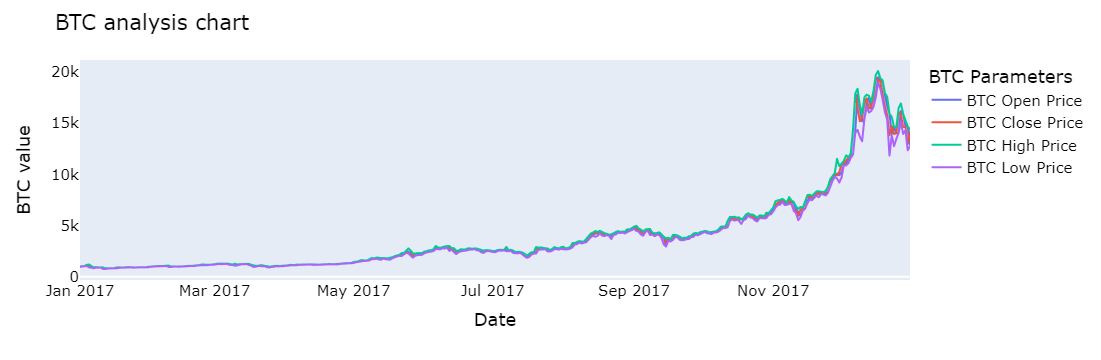

In [131]:
monthly_open_close_chart(monthly_2017)
monthly_high_low_chart(year_2017)
yearly_chart(year_2017)

In [112]:
year_2018 = yearly_analysis('2018-01-01','2018-12-31')

In [113]:
monthly_2018 = every_year_monthwise_analysis(year_2018)

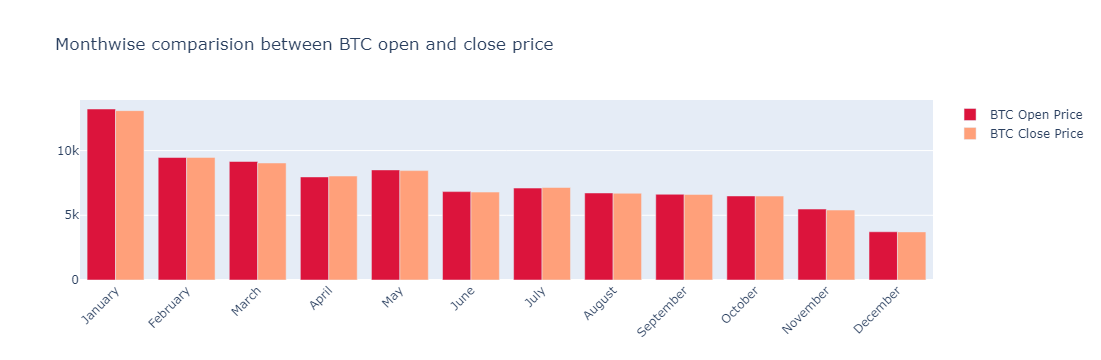

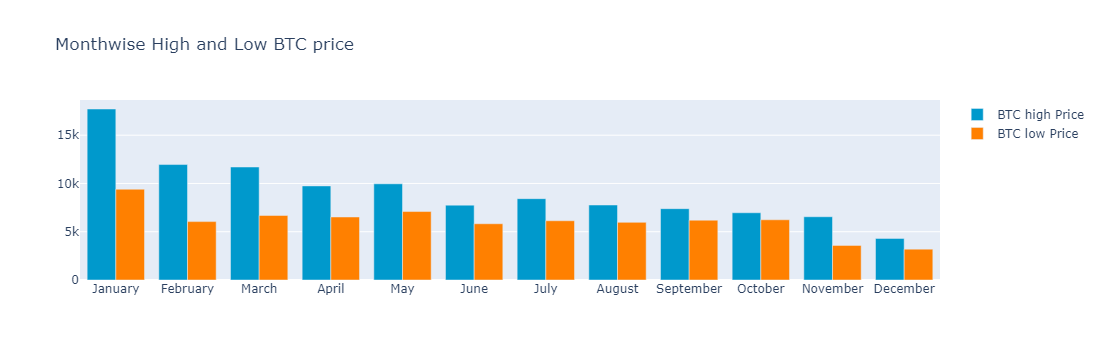

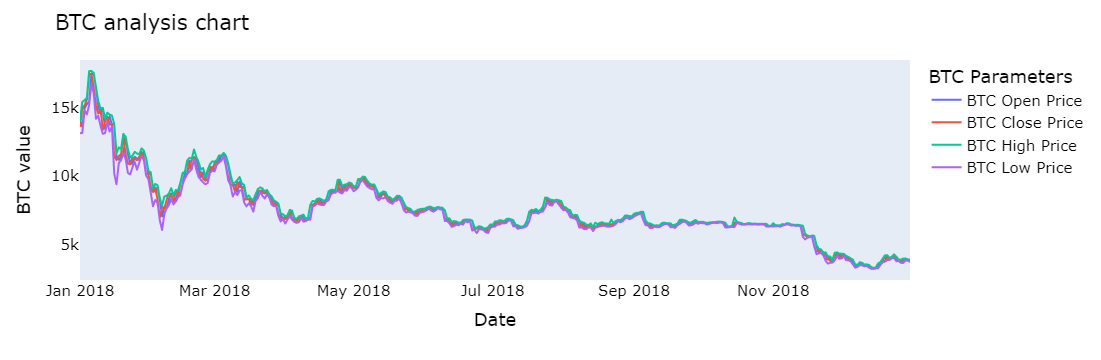

In [137]:
monthly_open_close_chart(monthly_2018)
monthly_high_low_chart(year_2018)
yearly_chart(year_2018)

In [114]:
year_2019 = yearly_analysis('2019-01-01','2019-12-31')

In [115]:
monthly_2019 = every_year_monthwise_analysis(year_2019)

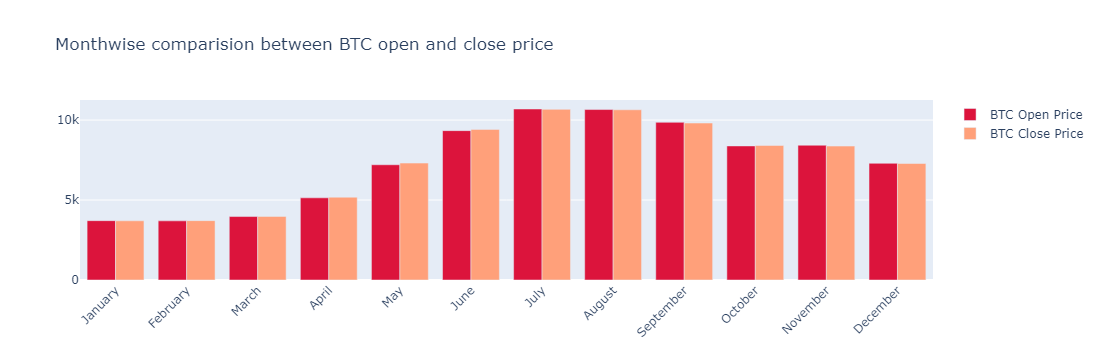

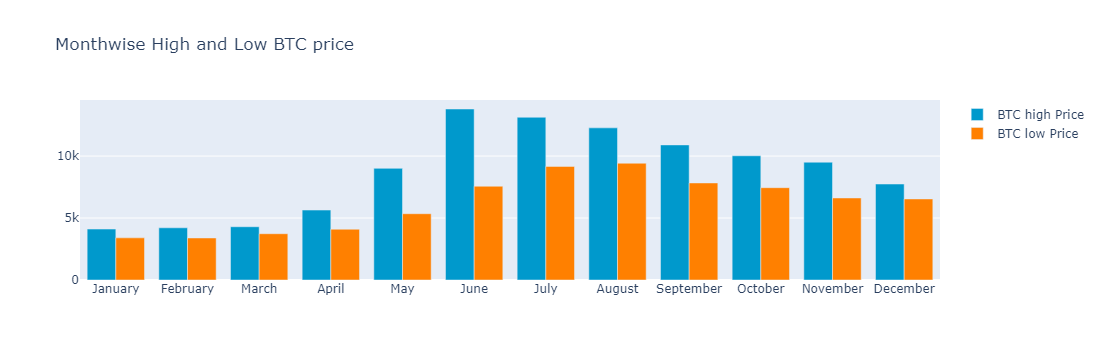

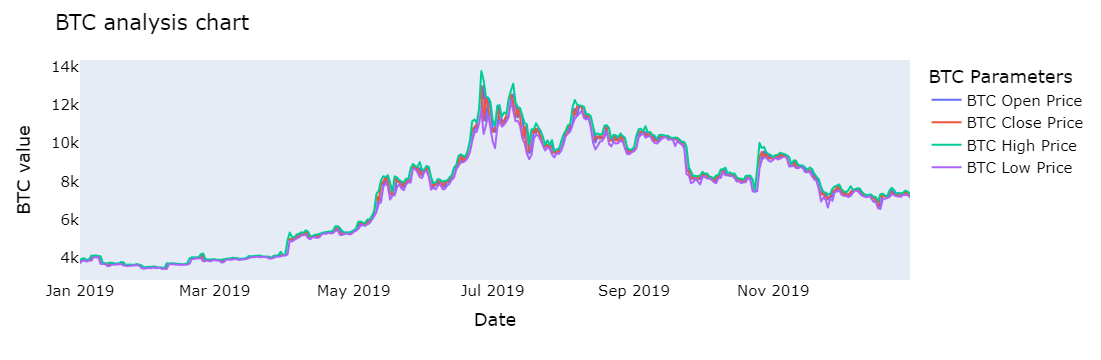

In [138]:
monthly_open_close_chart(monthly_2019)
monthly_high_low_chart(year_2019)
yearly_chart(year_2019)

In [121]:
year_2020 = yearly_analysis('2020-01-01','2020-12-31')

In [136]:
monthly_2020 = every_year_monthwise_analysis(year_2020)

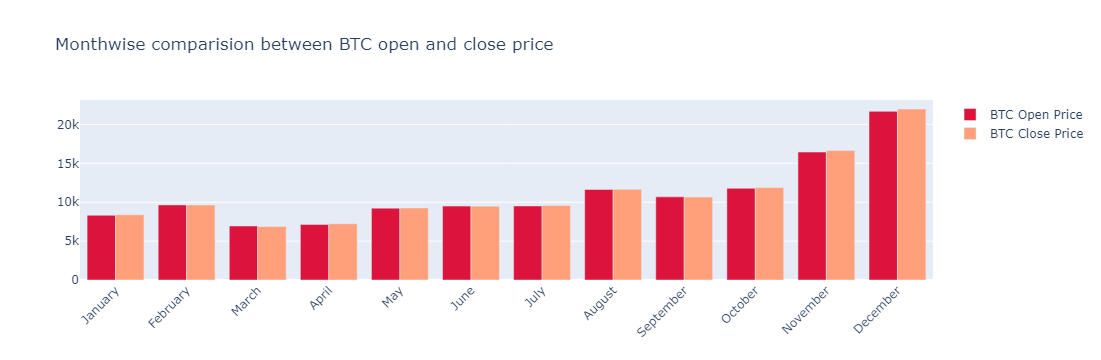

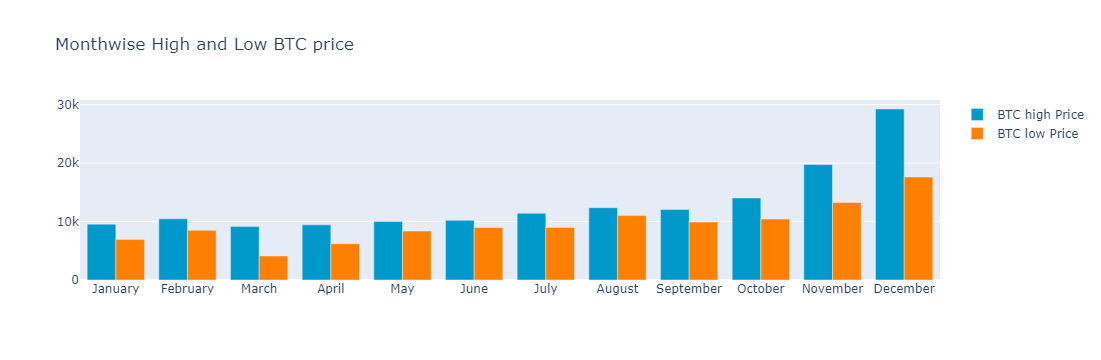

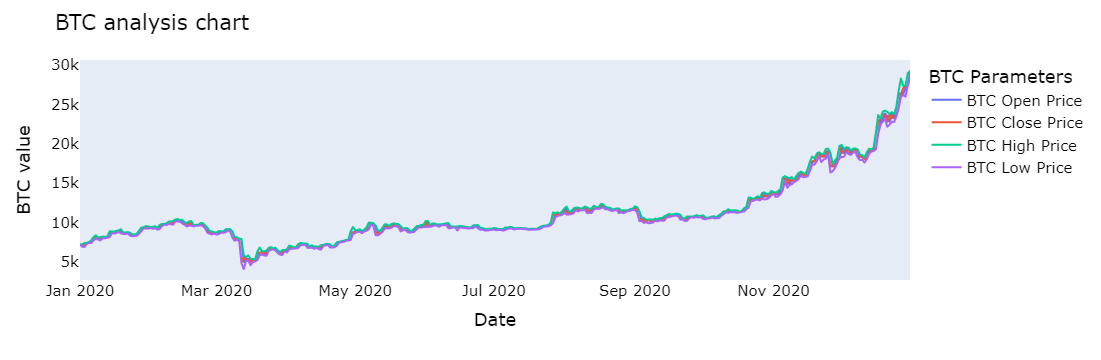

In [139]:
monthly_open_close_chart(monthly_2020)
monthly_high_low_chart(year_2020)
yearly_chart(year_2020)

In [123]:
year_2021 = yearly_analysis('2021-01-01','2021-12-31')

In [124]:
monthly_2021 = every_year_monthwise_analysis(year_2021)

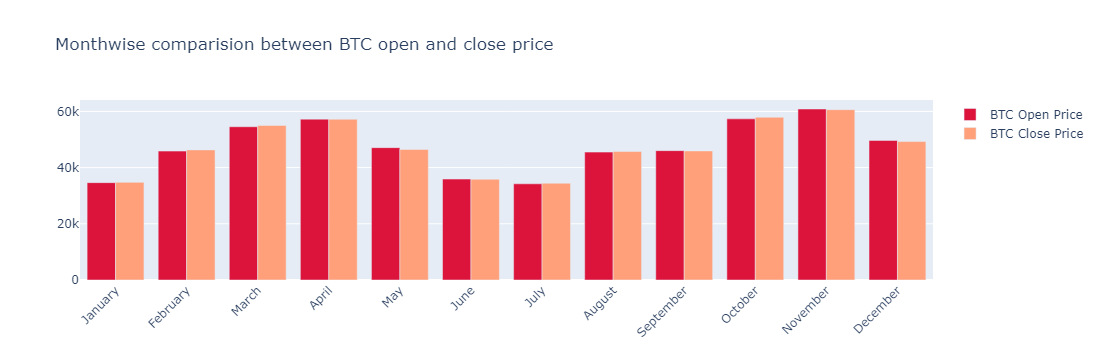

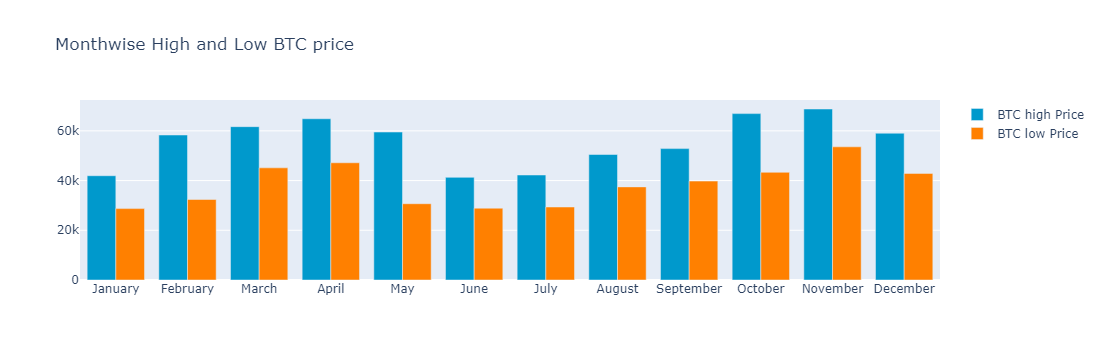

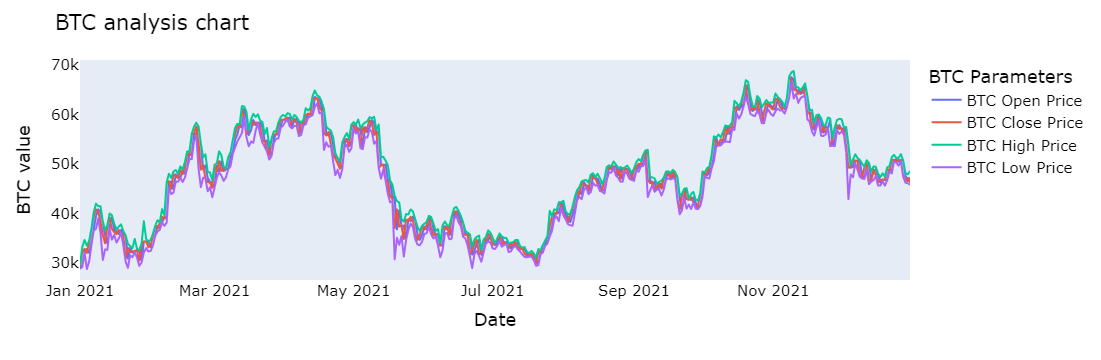

In [140]:
monthly_open_close_chart(monthly_2021)
monthly_high_low_chart(year_2021)
yearly_chart(year_2021)

In [125]:
year_2022 = yearly_analysis('2022-01-01','2022-12-31')

In [126]:
monthly_2022 = every_year_monthwise_analysis(year_2022)

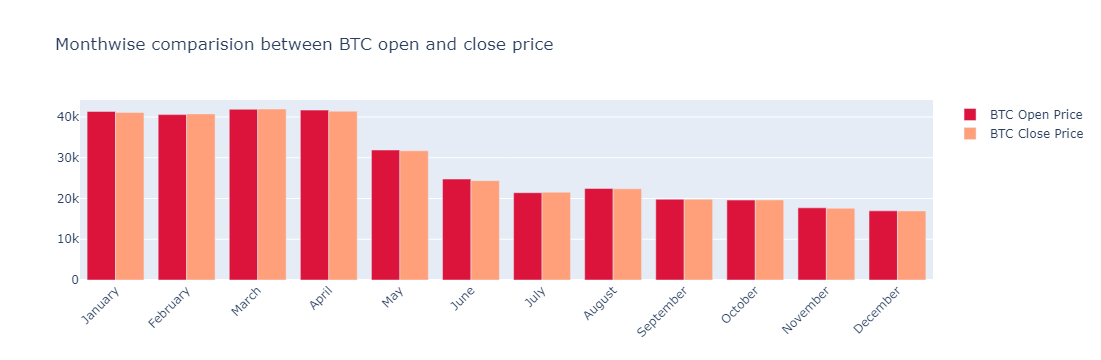

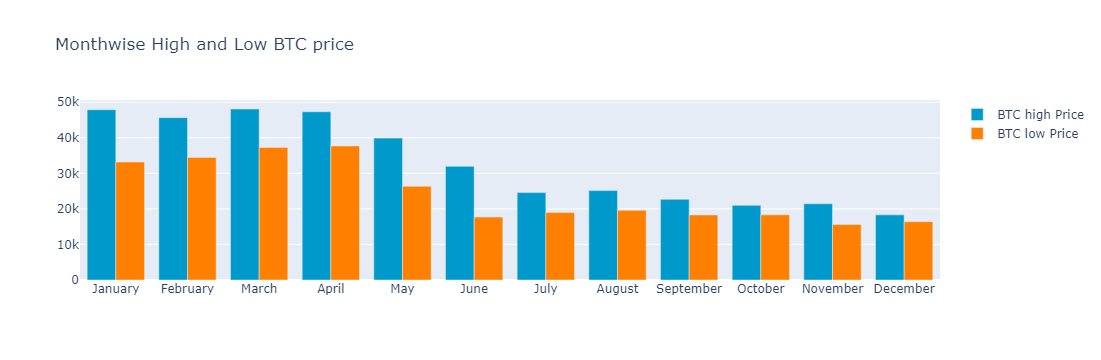

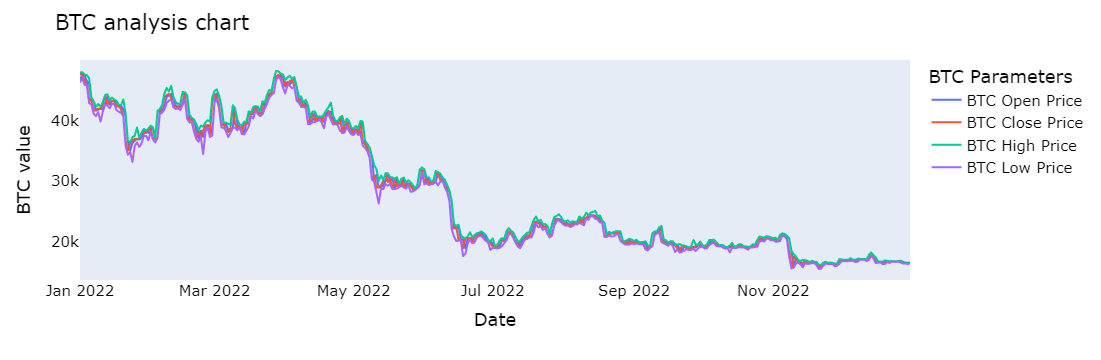

In [141]:
monthly_open_close_chart(monthly_2022)
monthly_high_low_chart(year_2022)
yearly_chart(year_2022)

In [127]:
year_2023 = yearly_analysis('2023-01-01','2023-12-31')

In [128]:
monthly_2023 = every_year_monthwise_analysis(year_2023)

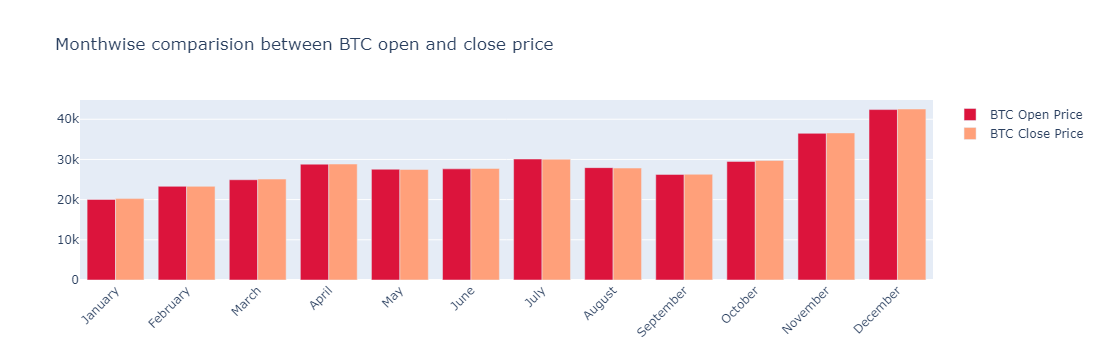

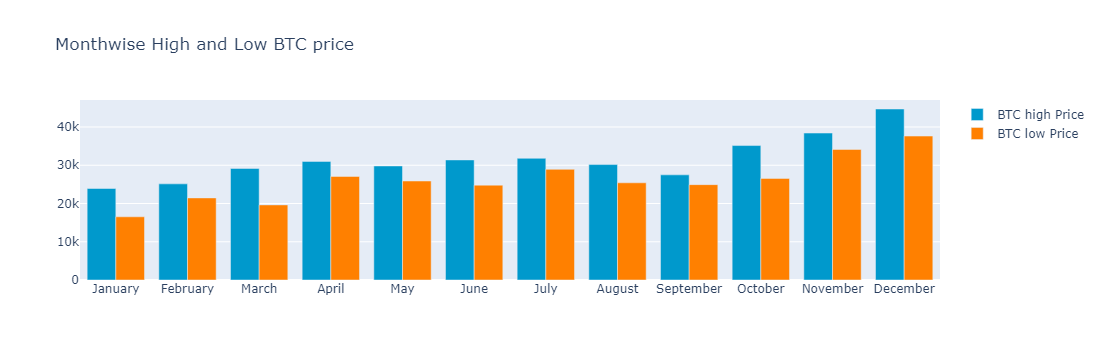

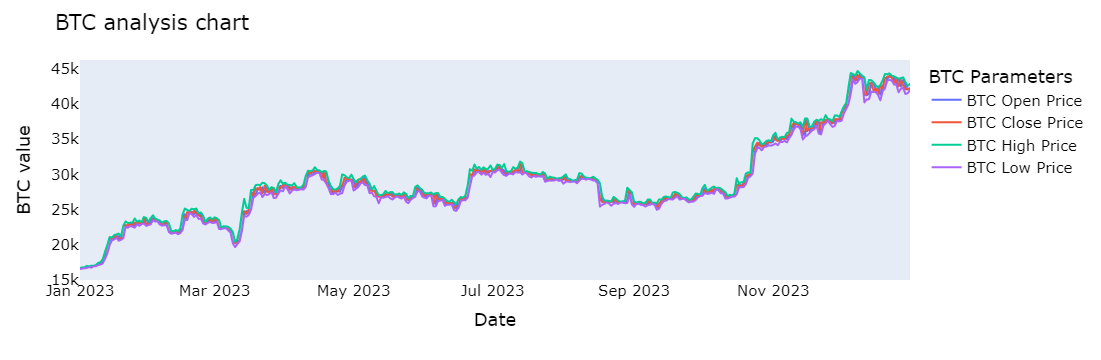

In [142]:
monthly_open_close_chart(monthly_2023)
monthly_high_low_chart(year_2023)
yearly_chart(year_2023)

In [129]:
year_2024 = yearly_analysis('2024-01-01',ed)

In [130]:
monthly_2024 = every_year_monthwise_analysis(year_2024)

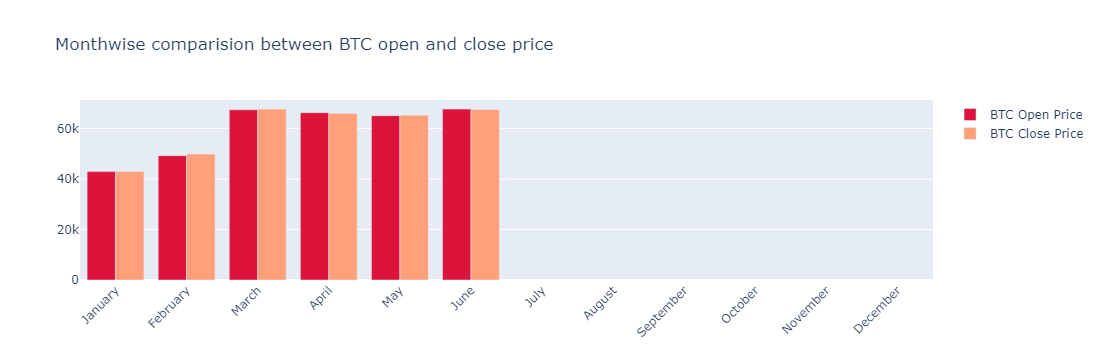

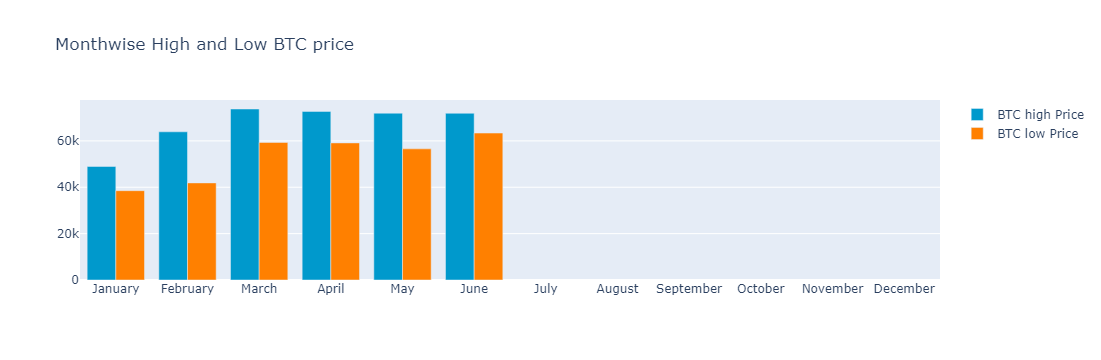

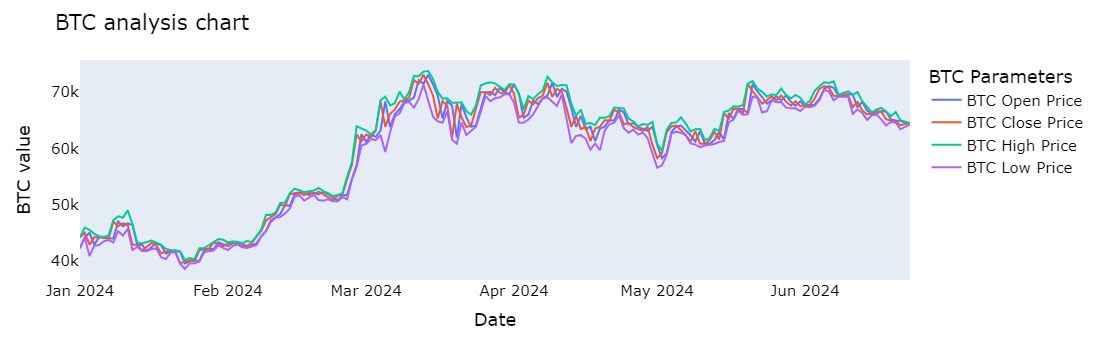

In [143]:
monthly_open_close_chart(monthly_2024)
monthly_high_low_chart(year_2024)
yearly_chart(year_2024)

In [146]:
year_overall = yearly_analysis(sd,ed)

In [149]:
monthly_overall = every_year_monthwise_analysis(year_overall)

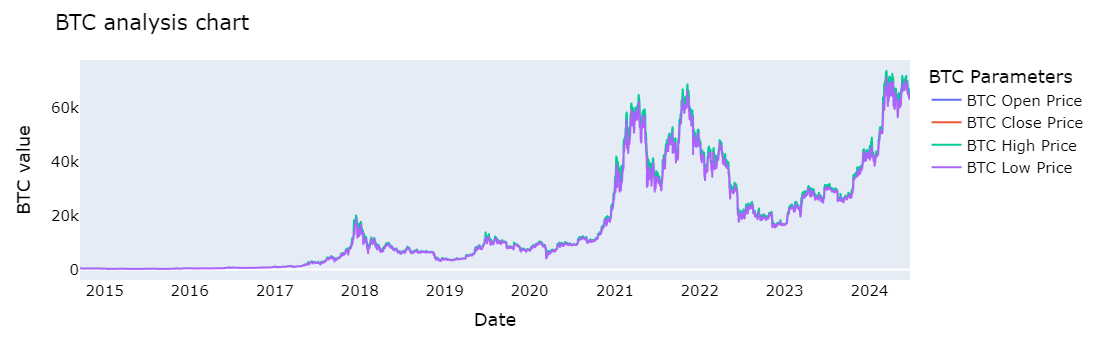

In [150]:
yearly_chart(year_overall)